<a href="https://colab.research.google.com/github/Claire080/PST_TRACKING_DRONE/blob/main/ML_TP3_YAHDIH_ABDELKERIM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#On dispose d’une base de données contenant 1797 images des 10 chiffres manuscrits.

#Charger la base de données digits disponible sous sklearn.

from sklearn.datasets import load_digits
digits = load_digits()
#Déterminer la dimension D des données et le nombre d’exemple par classe.


<Figure size 432x288 with 0 Axes>

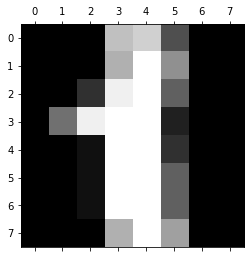

<Figure size 432x288 with 0 Axes>

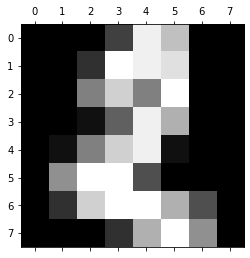

<Figure size 432x288 with 0 Axes>

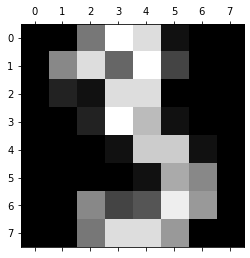

<Figure size 432x288 with 0 Axes>

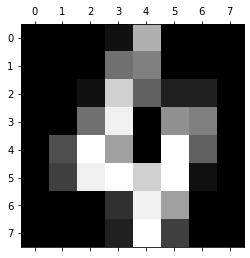

In [5]:
#Observer quelques images :
for index in range (1,5):
  import matplotlib.pyplot as plt
  plt.gray()
  plt.matshow(digits.images[index]) #index est le numéro de l’image
  plt.show()

In [6]:
#Pour récupérer les données et les labels :

X = digits.data
y = digits.target

In [7]:
#Séparer une fois pour toutes la base initiale en deux : apprentissage (70%) et test (30%) (model_selection.train_test_split).
from sklearn import model_selection
#Réponse :
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)



Iteration 1, loss = 0.72477583
Iteration 2, loss = 0.30724621
Iteration 3, loss = 0.25557024
Iteration 4, loss = 0.24640939
Iteration 5, loss = 0.25374490
Iteration 6, loss = 0.17656368
Iteration 7, loss = 0.17078520
Iteration 8, loss = 0.19029472
Iteration 9, loss = 0.16796378
Iteration 10, loss = 0.17392227
Iteration 11, loss = 0.14807587
Iteration 12, loss = 0.11346354
Iteration 13, loss = 0.14097802
Iteration 14, loss = 0.13861404
Iteration 15, loss = 0.12707696
Iteration 16, loss = 0.11010165
Iteration 17, loss = 0.12046439
Iteration 18, loss = 0.12196896
Iteration 19, loss = 0.12593330
Iteration 20, loss = 0.14122807
Iteration 21, loss = 0.11471889
Iteration 22, loss = 0.11039713
Iteration 23, loss = 0.09836975
Iteration 24, loss = 0.12099271
Iteration 25, loss = 0.12578452
Iteration 26, loss = 0.11679858
Iteration 27, loss = 0.08191928
Iteration 28, loss = 0.09533012
Iteration 29, loss = 0.18017397
Iteration 30, loss = 0.10446637
Iteration 31, loss = 0.10943072
Iteration 32, los

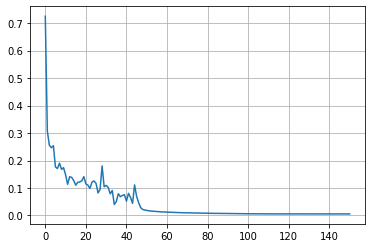

In [8]:
from sklearn.neural_network import MLPClassifier
C = 100 #hidden layer size
clf1 = MLPClassifier(hidden_layer_sizes=C, activation= 'tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=1)
clf1.fit(X_train, y_train)
print('best loss = ', clf1.best_loss_)
plt.plot(clf1.loss_curve_)
plt.grid()
plt.show()


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(10,): train score=0.958, test score=0.889


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(20,): train score=0.990, test score=0.922


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(30,): train score=0.997, test score=0.941


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(40,): train score=0.994, test score=0.943


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(50,): train score=0.998, test score=0.948


/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


hidden_layer=(60,): train score=0.995, test score=0.946
hidden_layer=(70,): train score=1.000, test score=0.943
hidden_layer=(80,): train score=0.999, test score=0.956
hidden_layer=(90,): train score=0.999, test score=0.967
hidden_layer=(100,): train score=1.000, test score=0.954


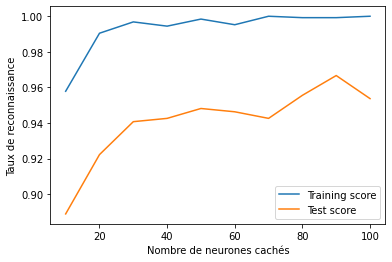

In [9]:
hidden_layer_sizes = [(i,) for i in range(10, 101, 10)]

train_scores = []
test_scores = []

for c in hidden_layer_sizes:
    clf = MLPClassifier(hidden_layer_sizes=c, activation='tanh', solver='sgd', batch_size=1, alpha=0, learning_rate='adaptive', verbose=0)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"hidden_layer={c}: train score={train_score:.3f}, test score={test_score:.3f}")

## influence of nurones numbers 

import matplotlib.pyplot as plt

plt.plot([c for (c,) in hidden_layer_sizes], train_scores, label='Training score')
plt.plot([c for (c,) in hidden_layer_sizes], test_scores, label='Test score')
plt.xlabel('Nombre de neurones cachés')
plt.ylabel('Taux de reconnaissance')
plt.legend()
plt.show()

# **PARTIE 3**

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np


from sklearn.model_selection import validation_curve

X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

C = np.array([1,2,3,4,5,8,10,15,20,25,30,35,40])

mlp1 = MLPClassifier(activation='tanh', solver='adam', batch_size=1,alpha=0, learning_rate='adaptive',early_stopping=True, validation_fraction=0.2)

train_scores, val_scores = validation_curve(mlp1, X_train2, y_train2, param_name="hidden_layer_sizes",param_range=C,scoring="accuracy", cv=10)



print("Train scores:\n", train_scores)
print("Validation scores:\n", val_scores)

print("Train accuracy: {:.3f} +/- {:.3f}".format(np.mean(train_scores), np.std(train_scores)))
print("Validation accuracy: {:.3f} +/- {:.3f}".format(np.mean(val_scores), np.std(val_scores)))



Train scores:
 [[0.19358407 0.17920354 0.21902655 0.19911504 0.21902655 0.09834254
  0.19116022 0.19779006 0.0961326  0.19668508]
 [0.39269912 0.19911504 0.2090708  0.40707965 0.39048673 0.37569061
  0.18895028 0.20441989 0.26298343 0.44088398]
 [0.64048673 0.30199115 0.72345133 0.55641593 0.21017699 0.62872928
  0.46629834 0.65414365 0.39668508 0.60662983]
 [0.58185841 0.49225664 0.76880531 0.81747788 0.79424779 0.77458564
  0.80773481 0.83314917 0.73812155 0.84530387]
 [0.90929204 0.57522124 0.92699115 0.70022124 0.91261062 0.93701657
  0.91270718 0.9359116  0.9281768  0.8121547 ]
 [0.95685841 0.97787611 0.98230088 0.88495575 0.94247788 0.9679558
  0.9480663  0.98453039 0.96132597 0.9679558 ]
 [0.96128319 0.93584071 0.97123894 0.95353982 0.95575221 0.96906077
  0.97016575 0.96464088 0.98121547 0.97790055]
 [0.98230088 0.99004425 0.95464602 0.98672566 0.98119469 0.97900552
  0.99226519 0.99116022 0.9878453  0.97458564]
 [0.95022124 0.98893805 0.98893805 0.98783186 0.98783186 0.9878453

Meilleur nombre de neurones dans la couche cachée : 25
Matrice de confusion :
 [[50  0  0  0  4  0  0  0  0  0]
 [ 0 48  2  0  0  0  0  0  1  0]
 [ 0  0 59  0  0  0  0  0  0  0]
 [ 1  0  1 50  0  0  0  1  2  2]
 [ 2  1  0  0 50  0  0  0  2  0]
 [ 0  0  1  0  1 44  2  0  0  1]
 [ 1  1  0  0  0  0 61  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  2  0  0  0  2  0  0 40  0]
 [ 0  0  0  0  0  0  0  2  1 51]]


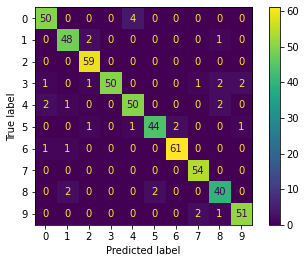

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# optimal number of nurones in hiding layer
best_n = C[np.argmax(np.mean(val_scores, axis=1))]
print("Meilleur nombre de neurones dans la couche cachée :", best_n)

#new training
mlp1 = MLPClassifier(hidden_layer_sizes=(best_n,), activation='tanh', solver='adam', batch_size=1,
                    alpha=0, learning_rate='adaptive', early_stopping=True, validation_fraction=0.2)
mlp1.fit(X_train2, y_train2)

# predictions in test
y_pred = mlp1.predict(X_test)

# la matrice de confusion
confusion_mat = metrics.confusion_matrix(y_test, y_pred)

print("Matrice de confusion :\n", confusion_mat)

render = metrics.ConfusionMatrixDisplay(confusion_mat)
render.plot()

In [17]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=1)

acc_train3 = []
for k in range (1, 64):
    one_NN = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    one_NN.fit(X_train, y_train)
    acc_train3.append(one_NN.score(X_train, y_train))    


print('mean accuracy Train = ',  round(np.mean(acc_train3),2))
print('std accuracy Train= ',  round(np.std(acc_train3),2))

mean accuracy Train =  0.96
std accuracy Train=  0.02


# **PARTIE 4**

In [12]:
#distance reject
def argmax_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_masked = np.ma.array(y_argmax, mask=(np.amax(y, axis=1) < threshold))

    return y_masked.filled(-1)

#ambiguity reject
def argmax_top2_reject_threshold(y, threshold):
    y_argmax = np.argmax(y, axis=1)
    y_top2 = np.sort(y, axis=1)[:,-1:-3:-1]
    y_masked = np.ma.array(y_argmax, mask=((y_top2[:,0] - y_top2[:,1]) < threshold))

    return y_masked.filled(-1)

In [13]:
from sklearn.metrics import accuracy_score

# posterior probabilities of classes
y_proba = mlp1.predict_proba(X_test)

# thresholds for test
thresholds = np.arange(0, 1.01, 0.01)

reject_rates = []
recognition_rates = []
reject_rates_top2 = [] 
recognition_rates_top2 = [] 

# Testing every threshold
for threshold in thresholds:
    # Applying distance reject
    y_pred_reject = argmax_reject_threshold(y_proba, threshold)
    reject_rate = np.sum(y_pred_reject == -1) / len(y_pred_reject)
    recognition_rate = accuracy_score(y_test[y_pred_reject != -1], y_pred_reject[y_pred_reject != -1])
    reject_rates.append(reject_rate)
    recognition_rates.append(recognition_rate)

    # Applying ambiguity reject
    y_pred_top2_reject = argmax_top2_reject_threshold(y_proba, threshold)
    reject_rate_top2 = np.sum(y_pred_top2_reject == -1) / len(y_pred_top2_reject)
    recognition_rate_top2 = accuracy_score(y_test[y_pred_top2_reject != -1], y_pred_top2_reject[y_pred_top2_reject != -1])
    reject_rates_top2.append(reject_rate_top2)
    recognition_rates_top2.append(recognition_rate_top2)

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:495: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


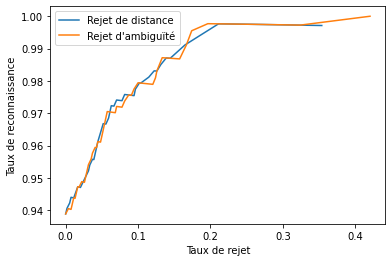

In [14]:
plt.plot(reject_rates, recognition_rates, label='Rejet de distance')
plt.plot(reject_rates_top2, recognition_rates_top2, label='Rejet d\'ambiguïté')
plt.xlabel('Taux de rejet')
plt.ylabel('Taux de reconnaissance')
plt.legend()
plt.show()

<ipython-input-15-10307b3965ec>:1: RuntimeWarning: divide by zero encountered in true_divide
  best_top2_thresholds = np.array(recognition_rates_top2) / np.array(reject_rates_top2)


Meilleur seuil : [         inf          inf 253.94052045 169.27374302 169.27374302
 126.94029851 101.74205607  84.94382022  72.80085768  56.83615819
  56.83615819  56.83615819  56.83615819  51.14716981  42.69886364
  42.69886364  36.59152634  34.21714286  34.21714286  34.21714286
  34.21714286  34.21714286  34.21714286  34.21714286  32.13979008
  30.30705208  27.16638044  27.16638044  25.85769231  23.55036855
  23.55036855  23.55036855  23.55036855  23.55036855  23.55036855
  23.55036855  22.52459844  22.52459844  21.62790698  20.76116505
  19.96108949  19.96108949  19.96108949  19.96108949  19.96108949
  18.60770089  18.00121466  17.43529412  17.43529412  16.90601432
  16.37672244  16.37672244  16.37672244  16.37672244  16.37672244
  16.37672244  16.37672244  16.37672244  14.15936812  13.81421682
  13.45923538  13.122       13.122       12.80121218  12.49569707
  11.95106305  11.20970178  10.75107029  10.75107029  10.75107029
  10.75107029  10.35005413  10.35005413  10.35005413   9.79

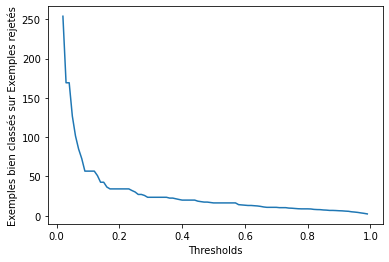

In [15]:
best_top2_thresholds = np.array(recognition_rates_top2) / np.array(reject_rates_top2)
print(f'Meilleur seuil : {best_top2_thresholds}')
plt.plot(thresholds, best_top2_thresholds)
plt.xlabel("Thresholds")
plt.ylabel("Exemples bien classés sur Exemples rejetés")
plt.show()

# **PAERIE 5**

Taux d'erreur global de la cascade de classifieurs : 3.33%


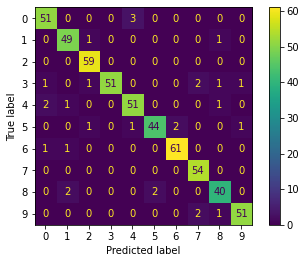

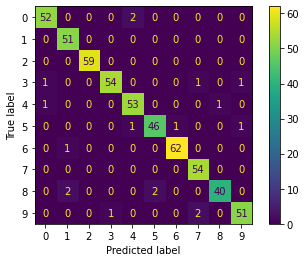

In [16]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay

arg1 = argmax_reject_threshold(mlp1.predict_proba(X_test),0.5)
arg2 = argmax_top2_reject_threshold(mlp1.predict_proba(X_test),0.5)

new_pred = np.squeeze(KNeighborsClassifier(n_neighbors=1, algorithm='brute').fit(X_train, y_train).predict(X_test))
y_pred1 = mlp1.predict(X_test)

tmp = np.where((arg1 != -1) & (arg1 != y_test), y_pred1, arg1)
tmp2 = np.where((arg2 != -1) & (arg2 != y_test), y_pred1, arg2)

tmp = np.where(tmp == -1, new_pred, tmp)
tmp2 = np.where(tmp2 == -1, new_pred, tmp2)

# Rate of global error
err_rate_cascade = 1 - metrics.accuracy_score(y_test, tmp2)

print("Taux d'erreur global de la cascade de classifieurs : {:.2f}%".format(err_rate_cascade*100))


cm = metrics.confusion_matrix(y_test, tmp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

cm = metrics.confusion_matrix(y_test, tmp2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
